In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as nm
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [74]:
data = pd.read_csv('marketing_customer_analysis.csv') 


In [75]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [76]:
#label_encoder_method

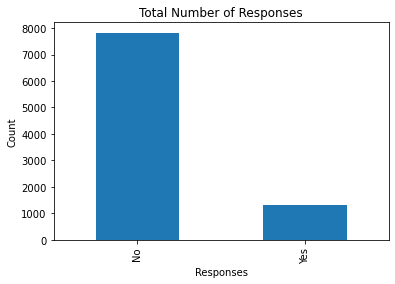

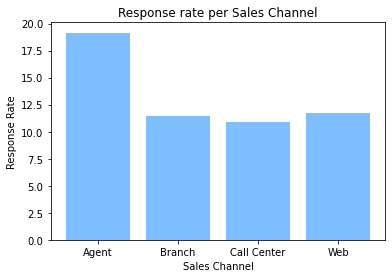

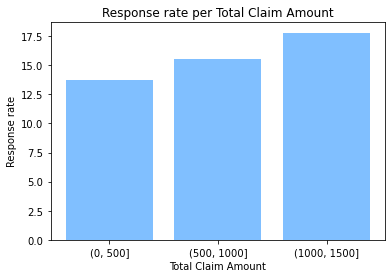

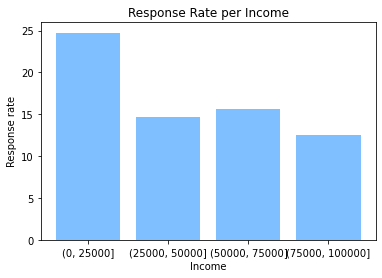

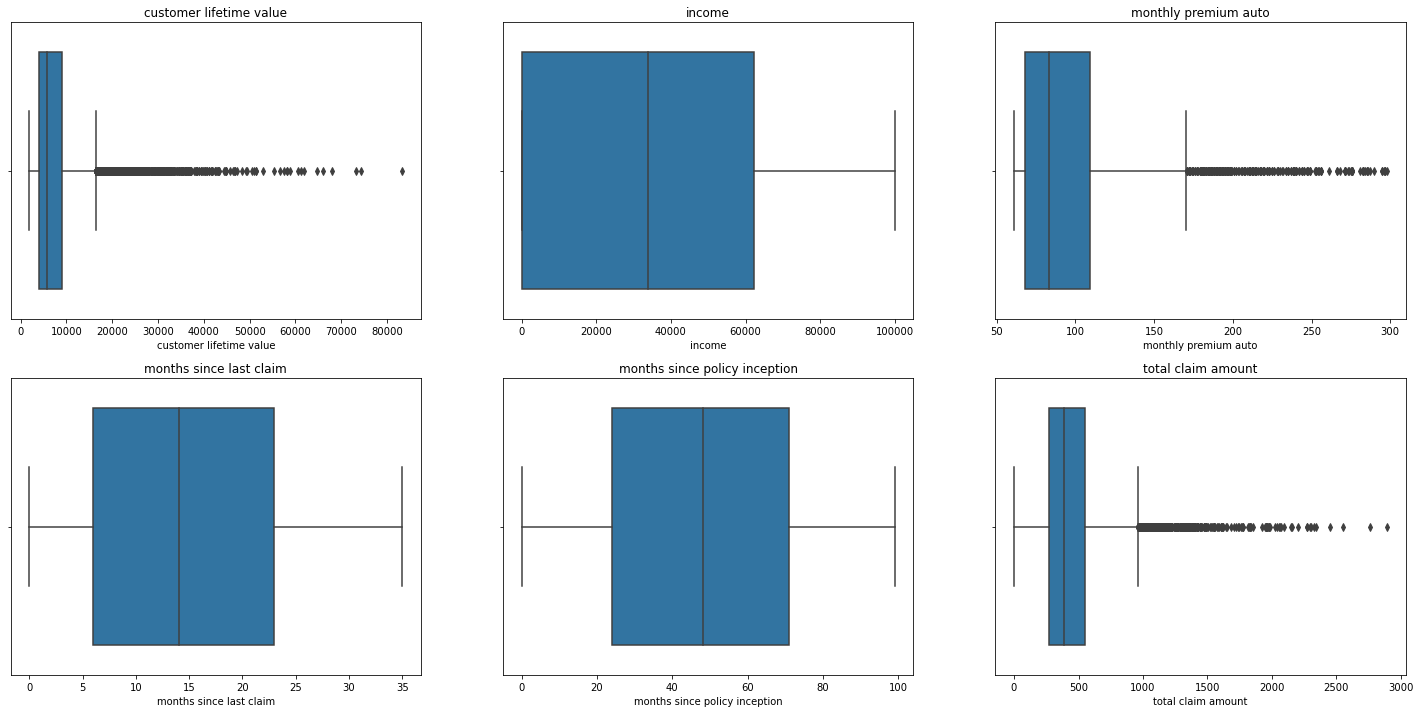

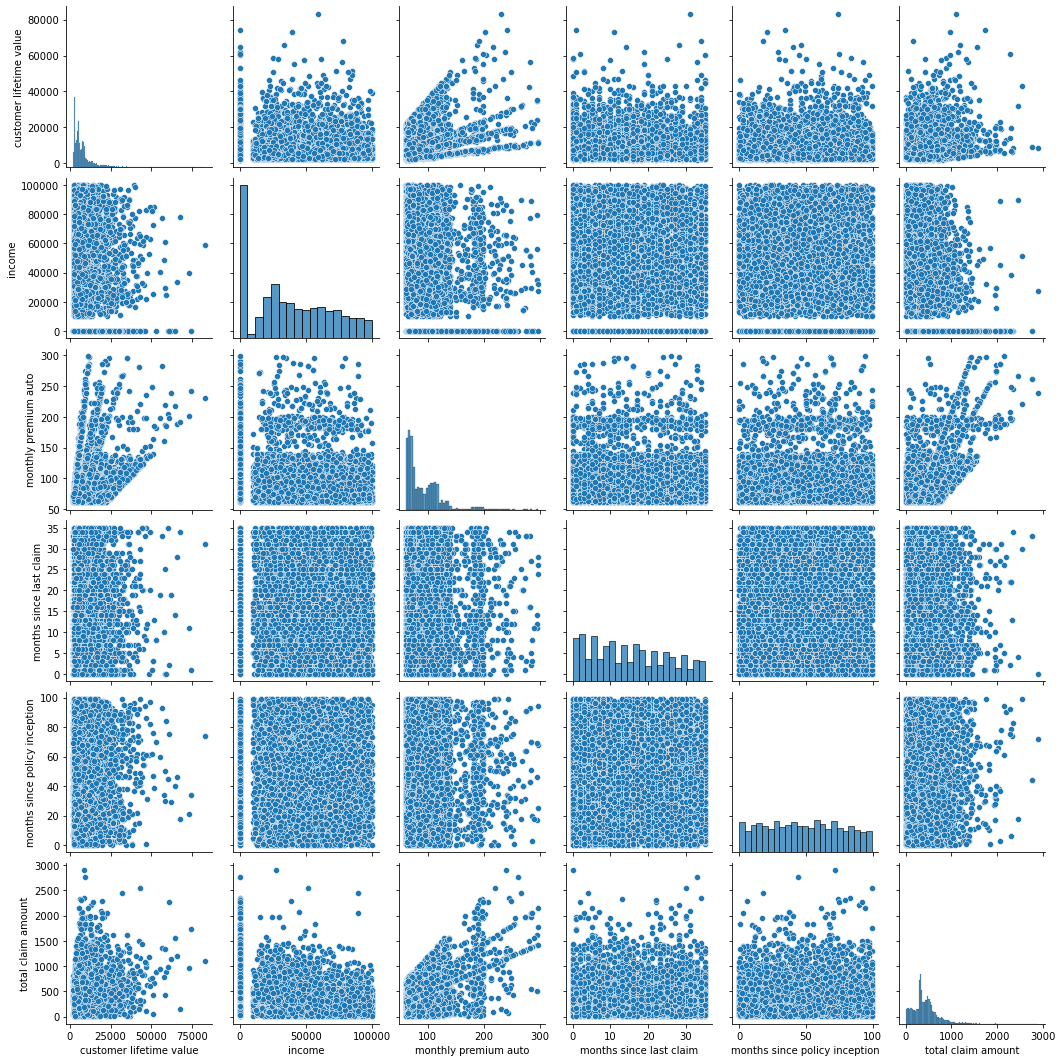

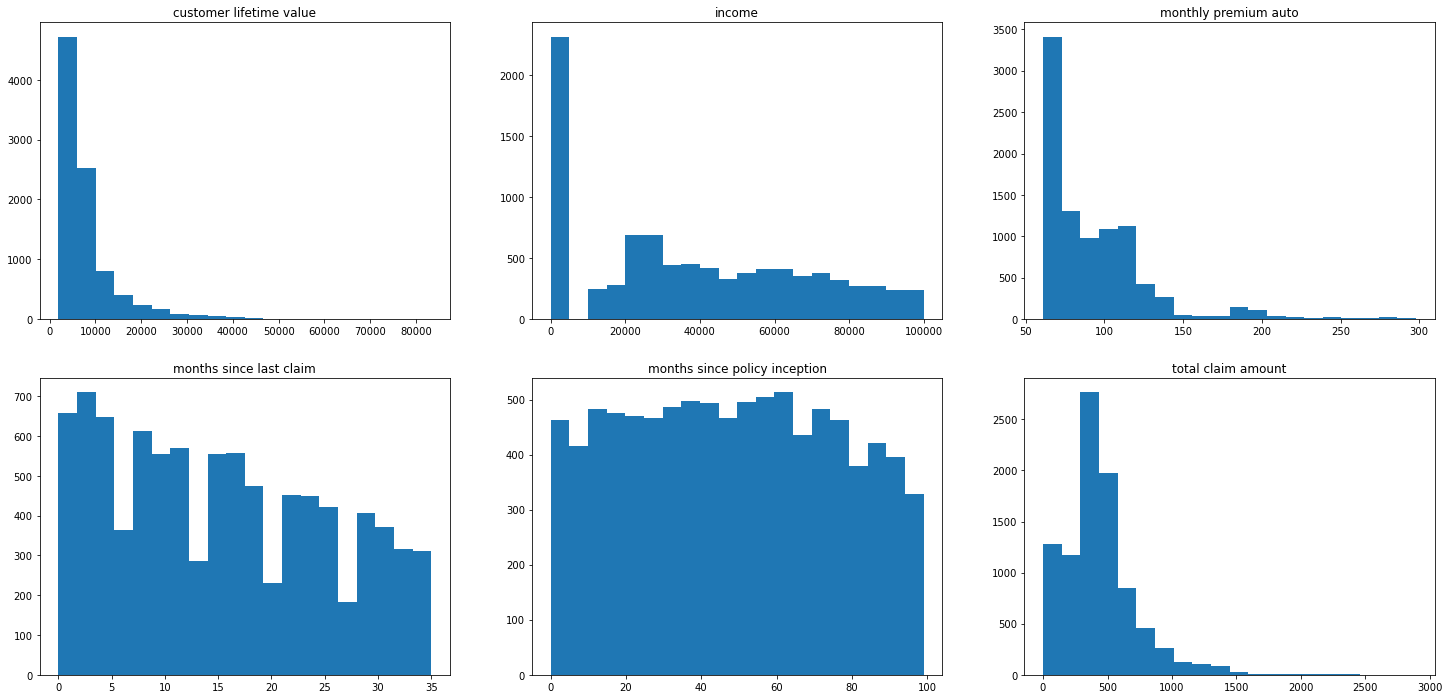

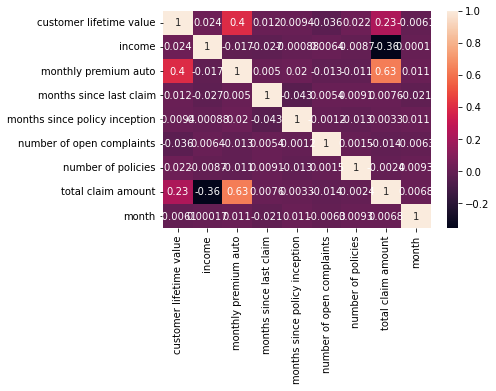

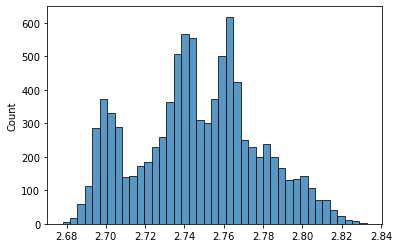

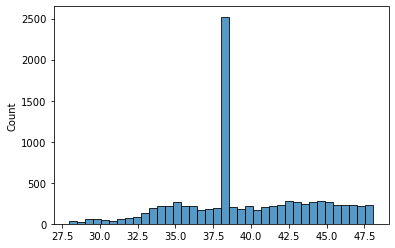

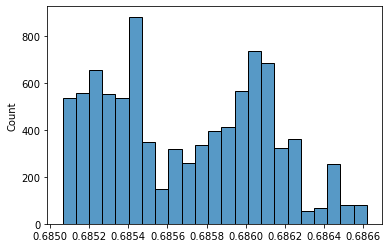

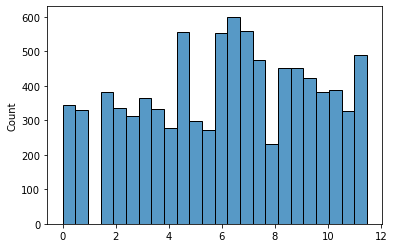

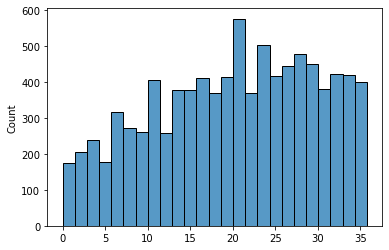

r2 score is:  0.7891558087734604
mean square error is:  16752.18367105187
root mean square error is:  129.4302270377823
root mean absolute error is:  66.54985520043732


In [77]:
def dealing_data(data):
    
    # from Lab 2
    cols = []
    for column in range(len(data.columns)):
        cols.append(data.columns[column].lower())
    data.columns = cols
    data.dropna(subset=['state','response','months since last claim', 'number of open complaints', 'vehicle class', 'vehicle size'],inplace=True)
    data['effective to date'] = pd.to_datetime(data['effective to date'],errors='coerce')
    data['month'] = pd.DatetimeIndex(data['effective to date']).month 
    
    # from Lab 3
    total_responses = data['response'].value_counts()
    total_responses.plot(kind='bar')
    plt.title('Total Number of Responses')
    plt.xlabel('Responses')
    plt.ylabel('Count')
    plt.show()
    response_rate = data['response'].groupby(data['sales channel']).value_counts(normalize=True).mul(100).reset_index(name='response_rate')
    response_rate = response_rate[response_rate['response'] == 'Yes']
    plt.bar(response_rate['sales channel'], response_rate['response_rate'], color='#80bfff')
    plt.xlabel("Sales Channel")
    plt.ylabel("Response Rate")
    plt.title("Response rate per Sales Channel")
    plt.show()
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
    data['total claim amount bins'] = pd.cut(data['total claim amount'], bins)
    percent_yes = data['response'].groupby(data['total claim amount bins']).value_counts(normalize=True).mul(100).reset_index(name='percentage_yes')
    percent_yes = percent_yes[percent_yes['response'] == 'Yes']
    plt.bar(percent_yes['total claim amount bins'].astype(str), percent_yes['percentage_yes'], color='#80bfff')
    plt.xlabel("Total Claim Amount")
    plt.ylabel("Response rate")
    plt.title("Response rate per Total Claim Amount")
    plt.show()
    data['income bins'] = pd.cut(data['income'],bins=[0, 25000, 50000, 75000, 100000])
    income_percent_yes = data['response'].groupby(data['income bins']).value_counts(normalize=True).mul(100).reset_index(name='income_percentage_yes')
    income_percent_yes = income_percent_yes[income_percent_yes['response'] == 'Yes']
    plt.bar(income_percent_yes['income bins'].astype(str), income_percent_yes['income_percentage_yes'], color='#80bfff')
    plt.xlabel("Income")
    plt.ylabel("Response rate")
    plt.title("Response Rate per Income")
    plt.show()
    
    # from Lab 4
    numerical = data._get_numeric_data()
    categorical = data.select_dtypes('object')
    fig, axs = plt.subplots(2, 3, figsize=(25, 12))
    for i, col in enumerate(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
        ax = axs[i//3, i%3]
        sns.boxplot(data=numerical, x=col, ax=ax)
        ax.set_title(col)
    plt.show()
    sns.pairplot(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']])
    plt.show()
    fig, axs = plt.subplots(2, 3, figsize=(25, 12))
    for i, col in enumerate(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
        ax = axs[i//3, i%3]
        ax.hist(numerical[col], bins=20)
        ax.set_title(col)
    plt.show()
    r = numerical.corr()
    r_high= numerical.corr(method='pearson')[numerical.corr() > 0.5]
    sns.heatmap(numerical.corr(),annot=True) 
    plt.show()
    
    # from Lab 5
    X=numerical.drop(["total claim amount"],axis=1).reset_index()
    
    Y=numerical["total claim amount"].reset_index()
    arr, lmbda = stats.boxcox(X['customer lifetime value'])
    sns.histplot(arr)
    plt.show()
    X["income_temp"]=np.where(X["income"]<0,0,X["income"])
    X["income_temp"]=X["income_temp"].replace(0,X["income"].mean())
    arr, lmbda=stats.boxcox(X["income_temp"])
    sns.histplot(arr)
    plt.show()
    arr, lmbda=stats.boxcox(X["monthly premium auto"])
    sns.histplot(arr)
    plt.show()
    X["months since last claim_temp"]=np.where(X["months since last claim"]<0,0,X["months since last claim"])
    X["months since last claim_temp"]=X["months since last claim_temp"].replace(0,X["months since last claim"].mean())
    arr, lmbda=stats.boxcox(X["months since last claim_temp"])
    sns.histplot(arr)
    plt.show()
    X["months since policy inception_temp"]=np.where(X["months since policy inception"]<0,0,X["months since policy inception"])
    X["months since policy inception_temp"]=X["months since policy inception_temp"].replace(0,X["months since policy inception"].mean())
    arr, lmbda=stats.boxcox(X["months since policy inception_temp"])
    sns.histplot(arr)
    plt.show()
    
    # from Lab 6
    categorical.drop(['customer'],axis=1,inplace=True)
    for col in categorical: 
        categorical[col + '_label'] = LabelEncoder().fit(categorical[col]).transform(categorical[col])
    num_categorical = categorical._get_numeric_data()
    final_table = pd.DataFrame(np.concatenate((X,num_categorical),axis=1))
    final_table.columns = X.columns.append(num_categorical.columns)
    X_train, X_test, Y_train, Y_test = train_test_split(final_table, Y, test_size=0.4, random_state=100)
    model = sm.OLS(Y_train,X_train).fit()
    predictions = model.predict(X_test)
    print('r2 score is: ',r2_score(Y_test,predictions))
    mse = mean_squared_error(Y_test, predictions)
    print('mean square error is: ',mse)
    rmse = math.sqrt(mse)
    print('root mean square error is: ',rmse)
    mae = mean_absolute_error(Y_test,predictions)
    print('root mean absolute error is: ',mae)

dealing_data(data) 

In [78]:
#one_hot_encoder_method

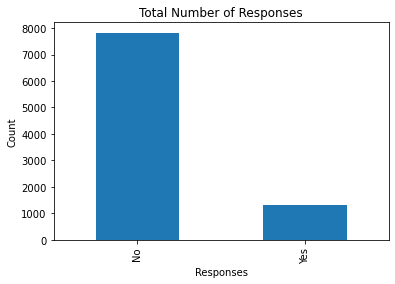

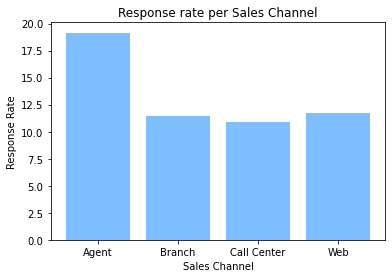

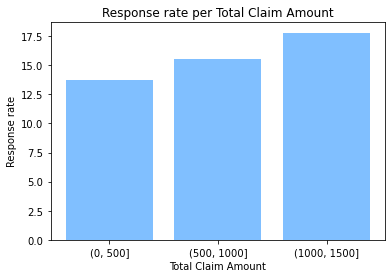

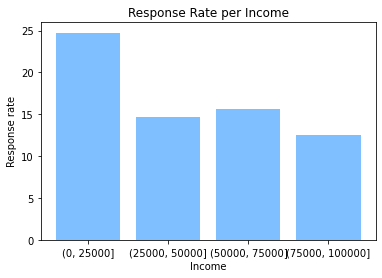

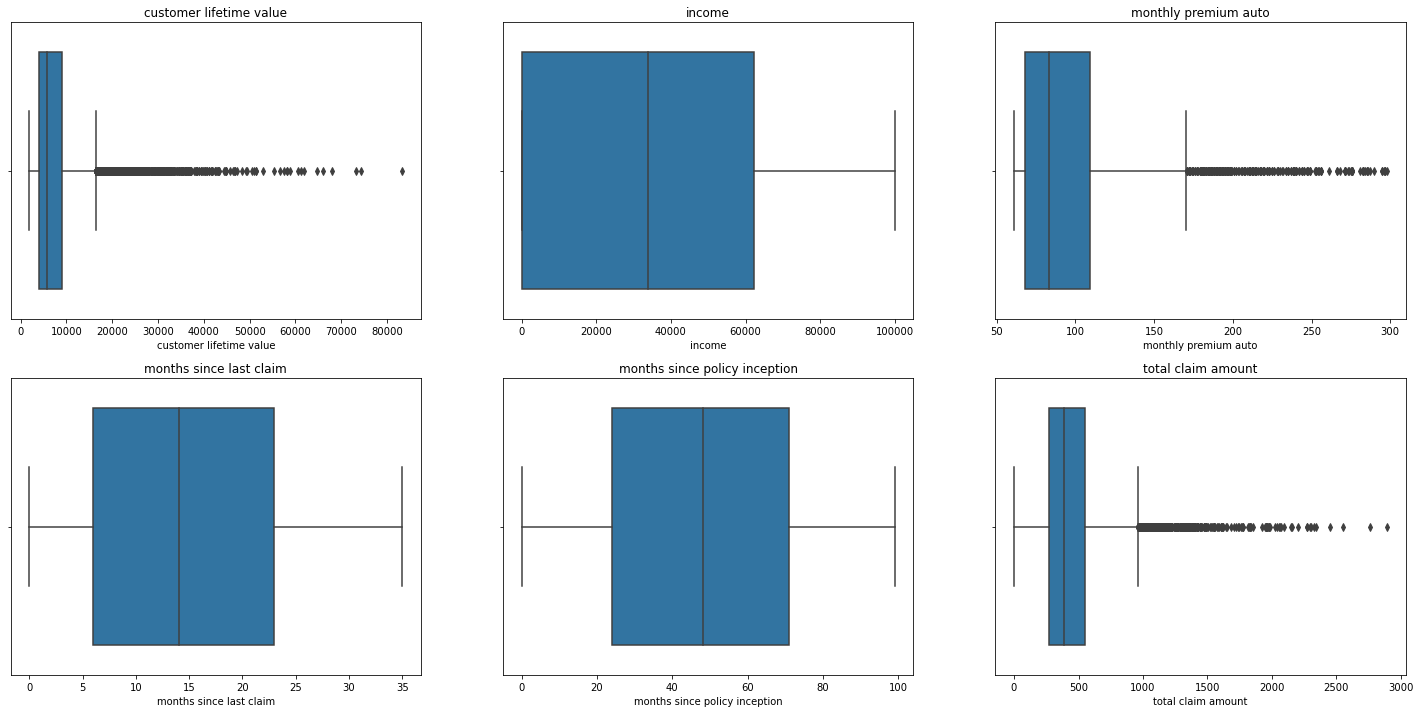

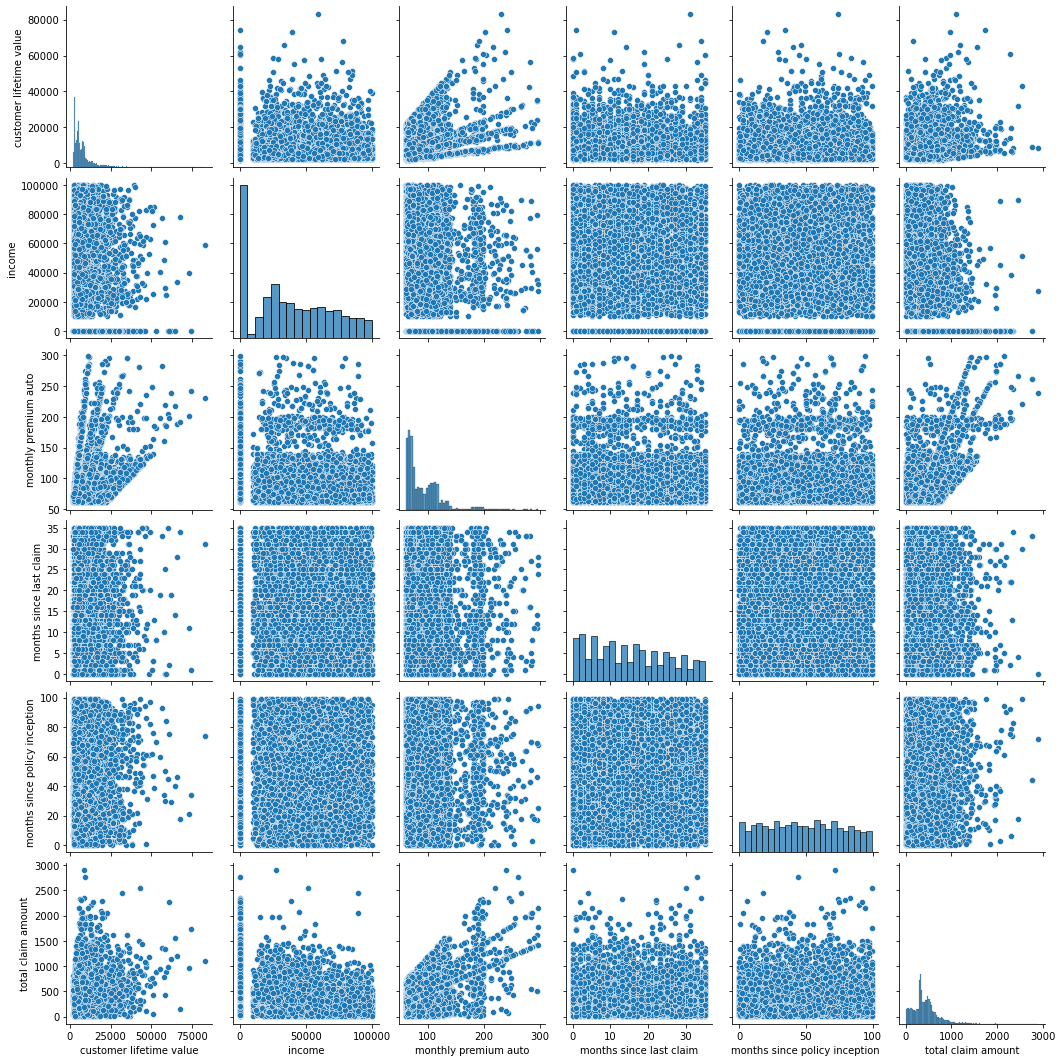

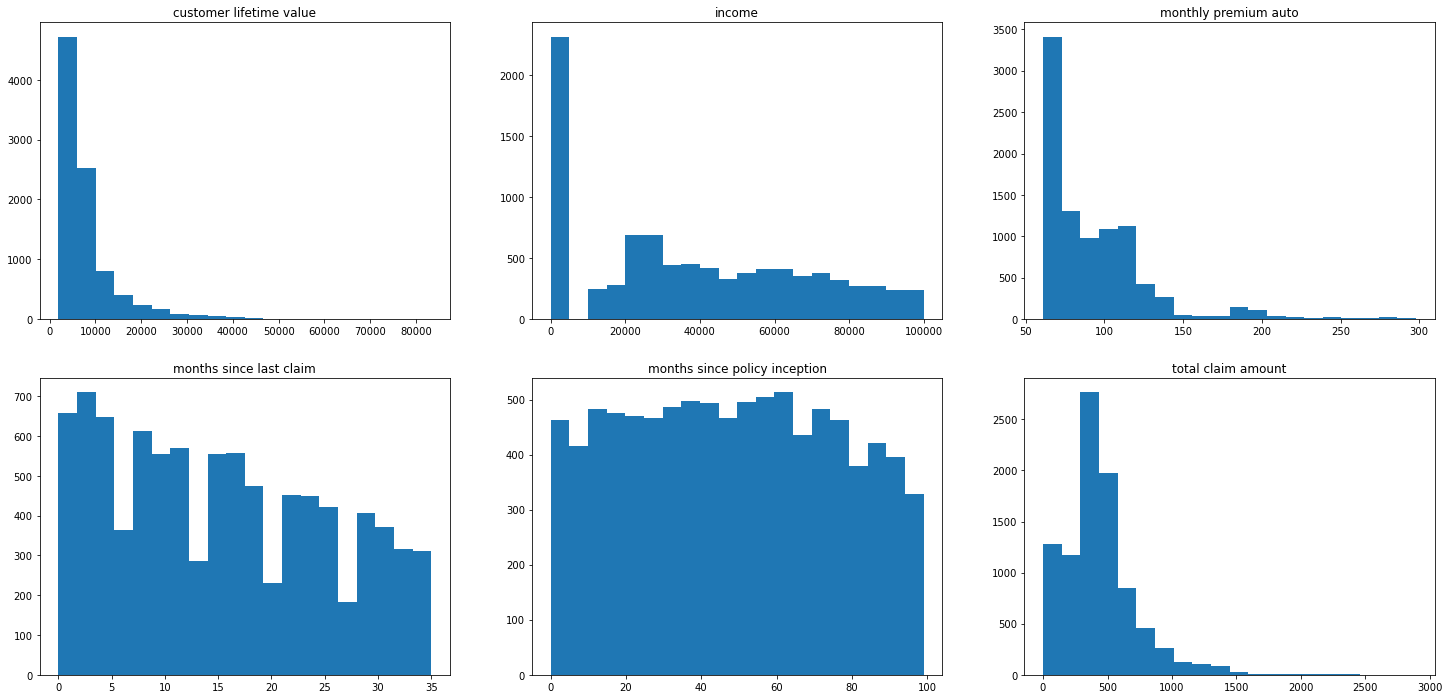

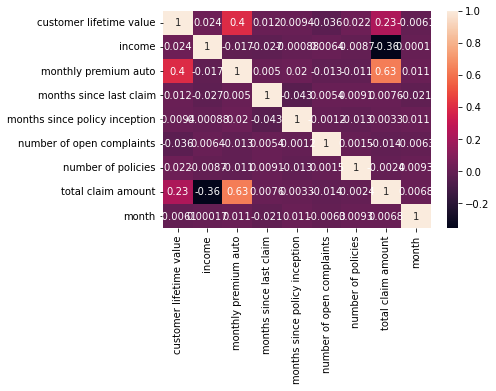

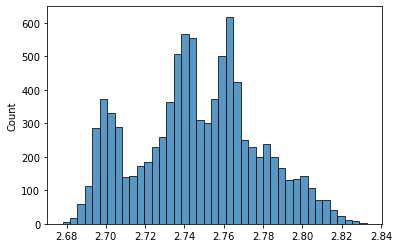

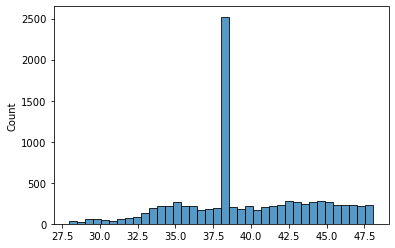

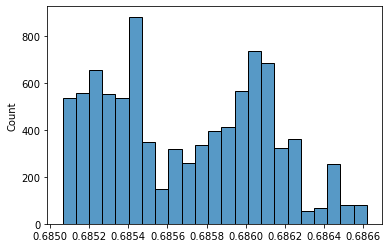

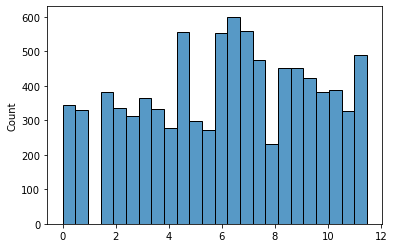

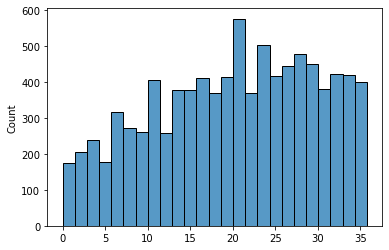

r2 score is:  0.8846382196766496
mean square error is:  9165.82866881014
root mean square error is:  95.73833437453432
root mean absolute error is:  47.38415727323281


In [79]:
data = pd.read_csv('marketing_customer_analysis.csv')

def dealing_data(data):
    
    # from Lab 2
    cols = []
    for column in range(len(data.columns)):
        cols.append(data.columns[column].lower())
    data.columns = cols
    data.dropna(subset=['state','response','months since last claim', 'number of open complaints', 'vehicle class', 'vehicle size'],inplace=True)
    data['effective to date'] = pd.to_datetime(data['effective to date'],errors='coerce')
    data['month'] = pd.DatetimeIndex(data['effective to date']).month
        
    # from Lab 3
    total_responses = data['response'].value_counts()
    total_responses.plot(kind='bar')
    plt.title('Total Number of Responses')
    plt.xlabel('Responses')
    plt.ylabel('Count')
    plt.show()
    response_rate = data['response'].groupby(data['sales channel']).value_counts(normalize=True).mul(100).reset_index(name='response_rate')
    response_rate = response_rate[response_rate['response'] == 'Yes']
    plt.bar(response_rate['sales channel'], response_rate['response_rate'], color='#80bfff')
    plt.xlabel("Sales Channel")
    plt.ylabel("Response Rate")
    plt.title("Response rate per Sales Channel")
    plt.show()
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
    data['total claim amount bins'] = pd.cut(data['total claim amount'], bins)
    percent_yes = data['response'].groupby(data['total claim amount bins']).value_counts(normalize=True).mul(100).reset_index(name='percentage_yes')
    percent_yes = percent_yes[percent_yes['response'] == 'Yes']
    plt.bar(percent_yes['total claim amount bins'].astype(str), percent_yes['percentage_yes'], color='#80bfff')
    plt.xlabel("Total Claim Amount")
    plt.ylabel("Response rate")
    plt.title("Response rate per Total Claim Amount")
    plt.show()
    data['income bins'] = pd.cut(data['income'],bins=[0, 25000, 50000, 75000, 100000])
    income_percent_yes = data['response'].groupby(data['income bins']).value_counts(normalize=True).mul(100).reset_index(name='income_percentage_yes')
    income_percent_yes = income_percent_yes[income_percent_yes['response'] == 'Yes']
    plt.bar(income_percent_yes['income bins'].astype(str), income_percent_yes['income_percentage_yes'], color='#80bfff')
    plt.xlabel("Income")
    plt.ylabel("Response rate")
    plt.title("Response Rate per Income")
    plt.show()
    
    # from Lab 4
    numerical = data._get_numeric_data()
    categorical = data.select_dtypes('object')
    fig, axs = plt.subplots(2, 3, figsize=(25, 12))
    for i, col in enumerate(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
        ax = axs[i//3, i%3]
        sns.boxplot(data=numerical, x=col, ax=ax)
        ax.set_title(col)
    plt.show()
    sns.pairplot(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']])
    plt.show()
    fig, axs = plt.subplots(2, 3, figsize=(25, 12))
    for i, col in enumerate(numerical[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','total claim amount']]):
        ax = axs[i//3, i%3]
        ax.hist(numerical[col], bins=20)
        ax.set_title(col)
    plt.show()
    r = numerical.corr()
    r_high= numerical.corr(method='pearson')[numerical.corr() > 0.5]
    sns.heatmap(numerical.corr(),annot=True) 
    plt.show()
    
    # from Lab 5
    X=numerical.drop(["total claim amount"],axis=1).reset_index()
    
    Y=numerical["total claim amount"].reset_index()
    arr, lmbda = stats.boxcox(X['customer lifetime value'])
    sns.histplot(arr)
    plt.show()
    X["income_temp"]=np.where(X["income"]<0,0,X["income"])
    X["income_temp"]=X["income_temp"].replace(0,X["income"].mean())
    arr, lmbda=stats.boxcox(X["income_temp"])
    sns.histplot(arr)
    plt.show()
    arr, lmbda=stats.boxcox(X["monthly premium auto"])
    sns.histplot(arr)
    plt.show()
    X["months since last claim_temp"]=np.where(X["months since last claim"]<0,0,X["months since last claim"])
    X["months since last claim_temp"]=X["months since last claim_temp"].replace(0,X["months since last claim"].mean())
    arr, lmbda=stats.boxcox(X["months since last claim_temp"])
    sns.histplot(arr)
    plt.show()
    X["months since policy inception_temp"]=np.where(X["months since policy inception"]<0,0,X["months since policy inception"])
    X["months since policy inception_temp"]=X["months since policy inception_temp"].replace(0,X["months since policy inception"].mean())
    arr, lmbda=stats.boxcox(X["months since policy inception_temp"])
    sns.histplot(arr)
    plt.show()
    
    # from Lab 6
    categorical.drop(['customer'],axis=1,inplace=True)
    One_hot = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical)).transform(pd.DataFrame(categorical)).toarray())
    final_table = pd.DataFrame(np.concatenate((X,One_hot),axis=1))
    X_train, X_test, Y_train, Y_test = train_test_split(final_table, Y, test_size=0.4, random_state=100)
    model = sm.OLS(Y_train,X_train).fit()
    predictions = model.predict(X_test)
    print('r2 score is: ',r2_score(Y_test,predictions))
    mse = mean_squared_error(Y_test, predictions)
    print('mean square error is: ',mse)
    rmse = math.sqrt(mse)
    print('root mean square error is: ',rmse)
    mae = mean_absolute_error(Y_test,predictions)
    print('root mean absolute error is: ',mae)
    
dealing_data(data)